In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#pobieranie danych
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [50]:
#ustawienie stylu wykresu
sns.set_style('dark')

<Axes: >

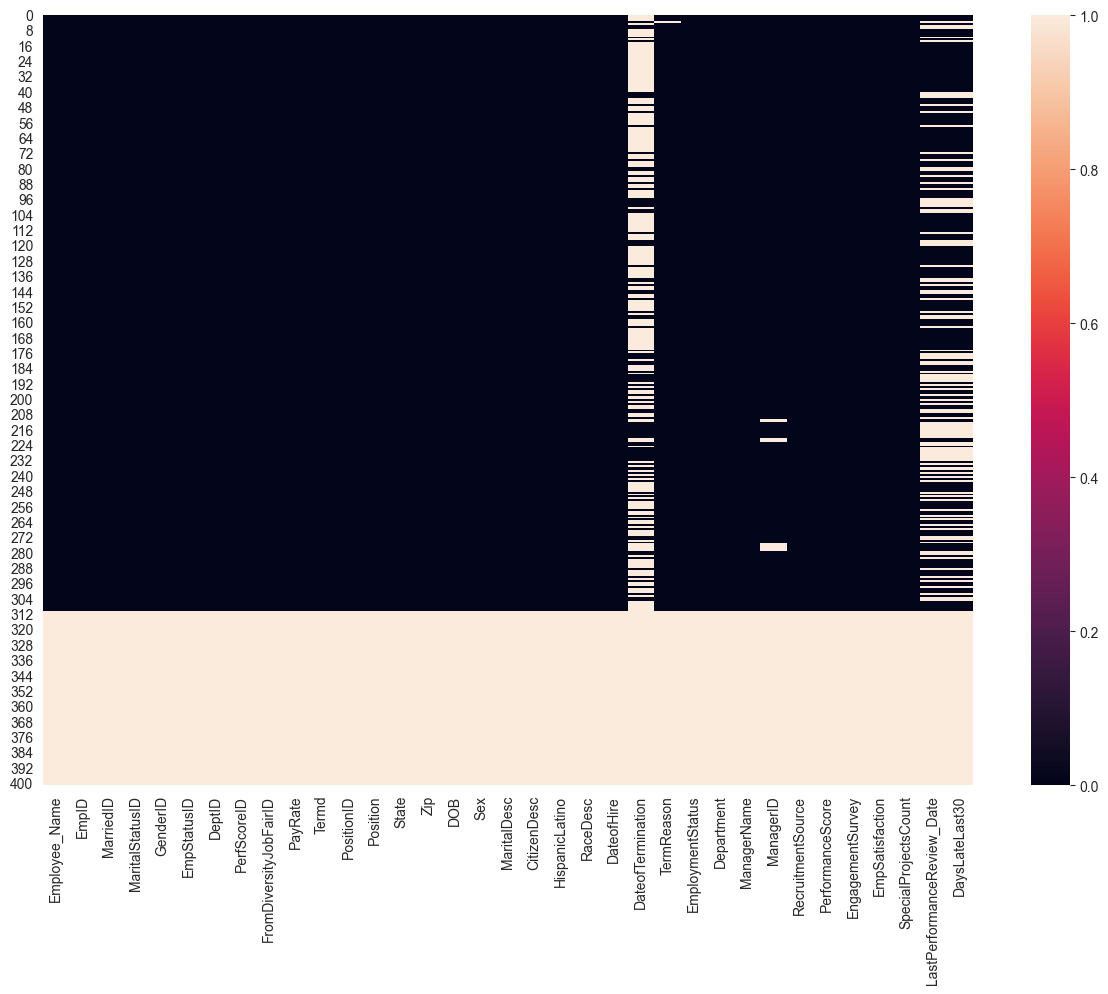

In [51]:
#Czyszczenie danych
df.isnull()
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

<Axes: >

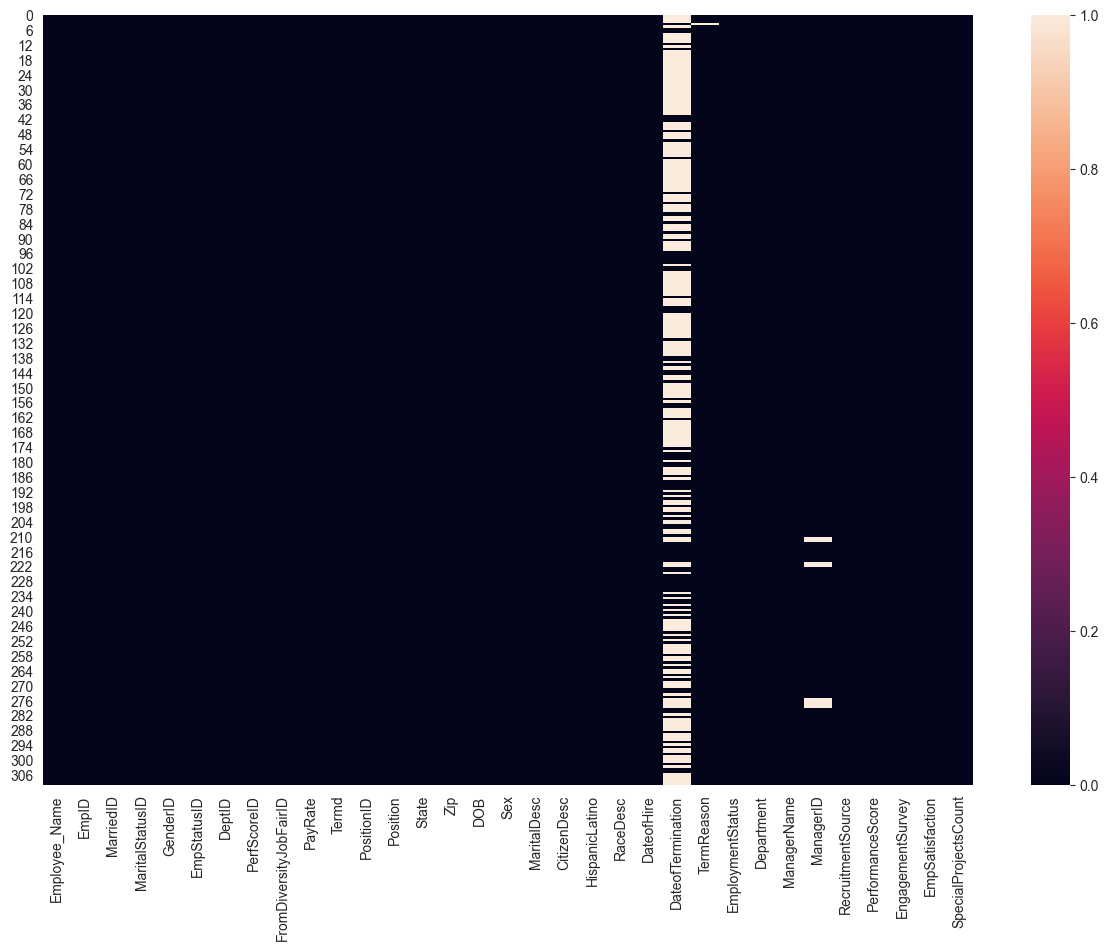

In [52]:
#usuwanie kolumn i wierszy z brakami
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

In [53]:
#sprawdzanie formatu dat
df[['DateofTermination','DOB','DateofHire']].copy().dtypes
df[['DateofTermination','DOB','DateofHire']].copy().head

<bound method NDFrame.head of     DateofTermination       DOB  DateofHire
0                 NaN  11/24/87  10/27/2008
1                 NaN  04/26/84    1/6/2014
2                 NaN  09/01/86   9/29/2014
3            04/15/15  09/16/85   2/16/2015
4                 NaN  05/19/88    5/1/2015
..                ...       ...         ...
305               NaN  01/18/52  11/10/2014
306               NaN  04/23/86  11/10/2014
307               NaN  02/09/83   6/30/2016
308               NaN  09/09/65  11/10/2014
309               NaN  05/02/78   3/30/2015

[310 rows x 3 columns]>

In [54]:
#konwertowanie daty
df.loc[:, 'DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y', errors='coerce')
df.loc[:, 'DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y', errors='coerce')
df.loc[:, 'DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y', errors='coerce')

df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24 00:00:00,2008-10-27 00:00:00
1,NaT,1984-04-26 00:00:00,2014-01-06 00:00:00
2,NaT,1986-09-01 00:00:00,2014-09-29 00:00:00
3,2015-04-15 00:00:00,1985-09-16 00:00:00,2015-02-16 00:00:00
4,NaT,1988-05-19 00:00:00,2015-05-01 00:00:00


1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [55]:
#sprawdzenie procentowego rozkładu ocen wydajności przyznawanych przez każdego managera
procent_score = df.groupby(["ManagerName"])["PerformanceScore"].value_counts(normalize=True).unstack().fillna(0)

#PIP - performance improvement plan - when employee is not meeting job performance goals

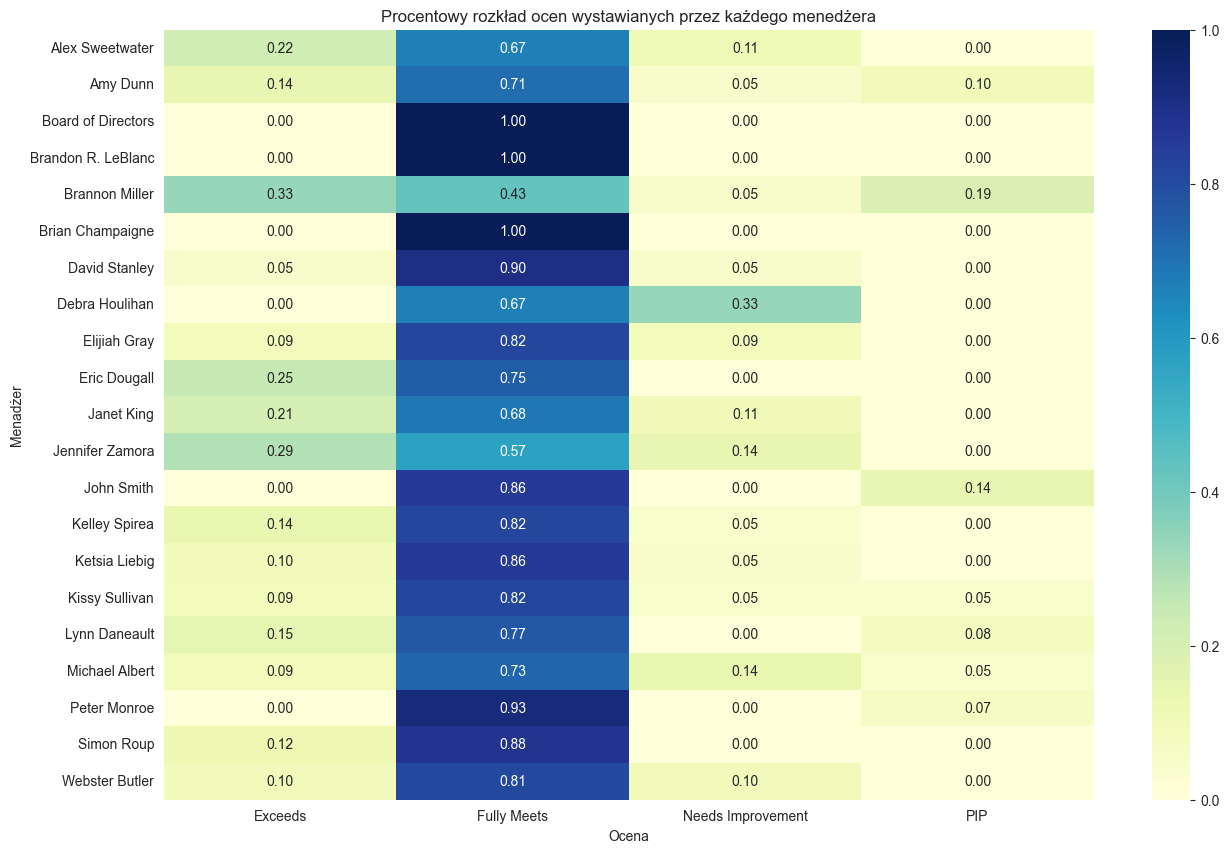

In [56]:
#wykres heatmapa procentowego rozkładu ocen przyznawanych przez każdego menedżera
plt.figure(figsize=(15,10))
sns.heatmap(procent_score, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Procentowy rozkład ocen wystawianych przez każdego menedżera")
plt.xlabel("Ocena")
plt.ylabel("Menadżer")
plt.show()

In [57]:
# sprawdzenie jaki procent managerów ocenia pracowników wyżej niż średnia + 1 odchylenie standardowe
score_map = {"PIP": 1, "Needs Improvement": 2, "Fully Meets": 3, "Exceeds": 4}

df.loc[:, "ScoreNum"] = df["PerformanceScore"].map(score_map)

manager_means = df.groupby("ManagerName")["ScoreNum"].mean()

global_mean = manager_means.mean()
std_dev = manager_means.std()

overraters = manager_means[manager_means > global_mean + std_dev]
underrates = manager_means[manager_means < global_mean - std_dev]

percent_overraters = len(overraters) / len(manager_means)

print("Procent manadżerów wystawiające wyższe oceny niż średnia ocen menadżerów:", percent_overraters)

Procent manadżerów wystawiające wyższe oceny niż średnia ocen menadżerów: 0.09523809523809523


In [58]:
#sprawdzenie jaki procent managerów ocenia pracowników niżej niż średnia - 1 odchylenie standardowe
percent_underrates = len(underrates) / len(manager_means)
print("Procent manadżerów wystawiające niższe oceny niż średnia ocen menadżerów:", percent_underrates)

Procent manadżerów wystawiające niższe oceny niż średnia ocen menadżerów: 0.09523809523809523


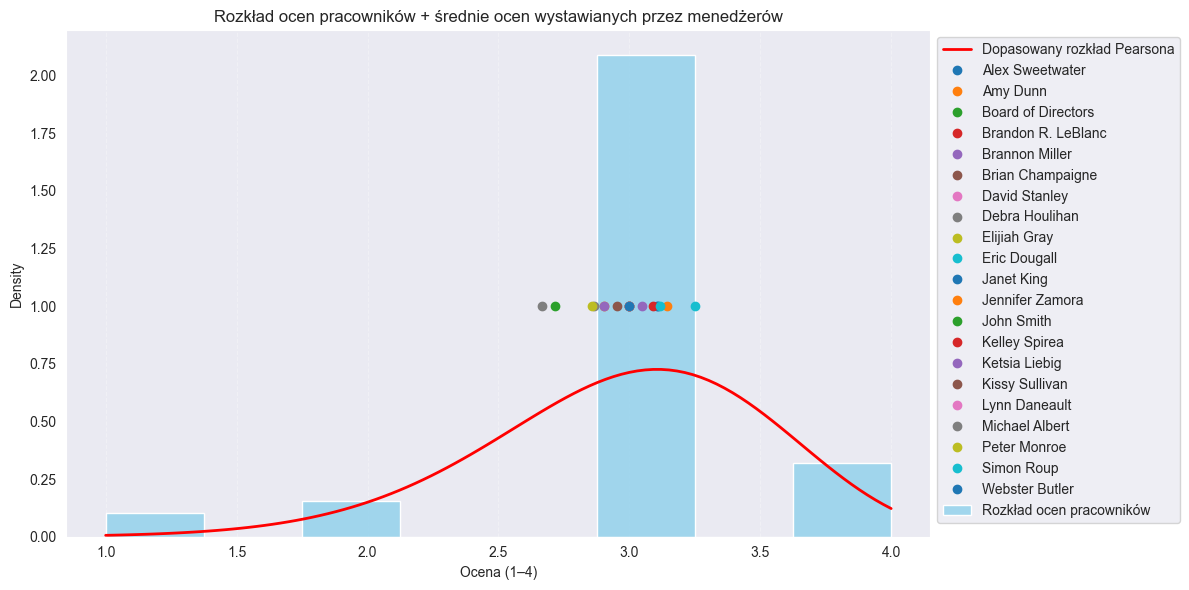

In [ ]:
#sprawdzenie korelacji i przedstawienie wyników na wykresie

from scipy.stats import pearson3

all_scores = df["ScoreNum"]
params = pearson3.fit(all_scores)
x = np.linspace(min(all_scores), max(all_scores), 100)
pdf = pearson3.pdf(x, *params)

plt.figure(figsize=(12, 6))
sns.histplot(all_scores, kde=False, stat="density", bins=8, color="skyblue", label="Rozkład ocen pracowników")
plt.plot(x, pdf, "r-", label="Dopasowany rozkład Pearsona", linewidth=2)

for name, mean in manager_means.items():
    plt.plot(mean, 1.0, 'o', label=name)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Ocena (1–4)")
plt.title("Rozkład ocen pracowników + średnie ocen wystawianych przez menedżerów")
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

ANALIZA:
Istnieje zauważalna zależność między tym, kto jest bezpośrednim przełożonym pracownika, a oceną jego wydajności.
- Heatmapa pokazuje znaczące różnice w stylu oceniania poszczególnych menedżerów. Niektórzy wystawiają niemal wyłącznie oceny „Fully Meets” (np. Board of Directors, Brandon R. LeBlanc), podczas gdy inni częściej stosują kategorie „Exceeds”, „Needs Improvement” lub nawet "PIP" (np. Brannon Miller, Debra Houlihan, Jennifer Zamora).
- Histogram z dopasowaną krzywą Pearsona pokazuje rozkład ocen ogółem. Kropki reprezentujące średnie wystawiane przez menedżerów pokazują, że różnią się oni między sobą pod względem surowości lub hojności oceniania.
- Metryka :
    - 9.5% managerów ocenia swoich pracowników hojniej niż sugeruje dopasowany model (overraters)
    - 9,5% menedżerów ocenia pracowników surowiej niż model (underraters).
    - 81% menedżerów mieści się w granicach dopasowanego rozkładu – co oznacza, że ich styl oceniania jest zgodny z oczekiwaniami statystycznymi.

Podsumowując styl oceniania zależy od menedżera, ale większość mieści się w normie.
Choć istnieją wyjątki – menedżerowie o bardziej hojnym lub surowym stylu – ich odsetek jest stosunkowo niewielki. W związku z tym system ocen wydaje się być dość spójny i umiarkowanie obiektywny, ale istnieją różnice indywidualne, które mogą wpływać na ostateczną ocenę pracownika.

2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [60]:
#obliczanie długości stażu pracowników
df = df.infer_objects()

today = pd.Timestamp.today()
df.loc[:, 'TenureDays'] = (df['DateofTermination'].fillna(today) - df['DateofHire']
).dt.days
df.loc[:, 'TenureYears'] = df['TenureDays'] / 365

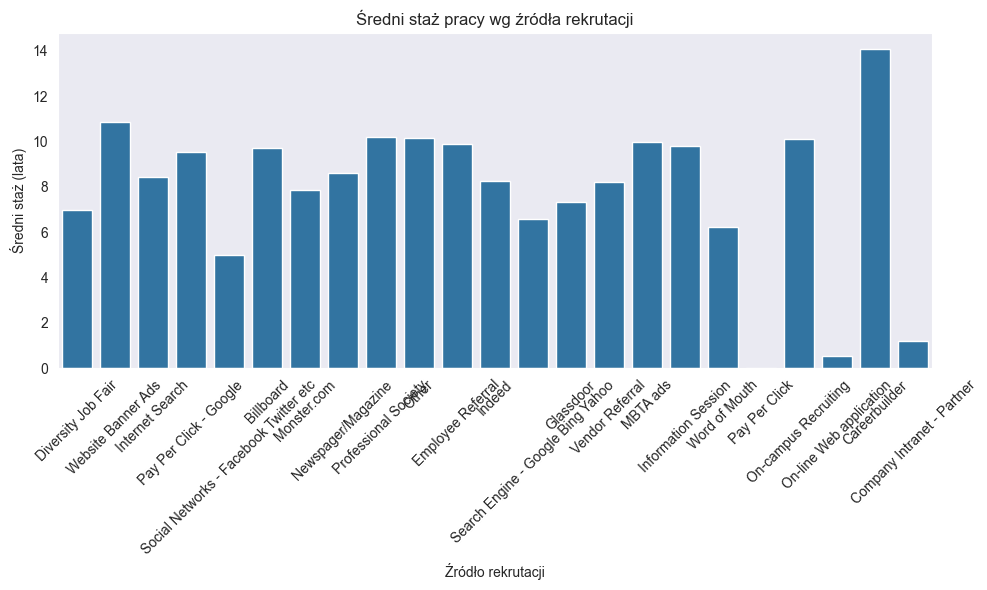

In [61]:
#tworzenie wykresu barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='RecruitmentSource', y='TenureYears', data=df, estimator='mean', errorbar=None)
plt.xticks(rotation=45)
plt.title('Średni staż pracy wg źródła rekrutacji')
plt.ylabel('Średni staż (lata)')
plt.xlabel('Źródło rekrutacji')
plt.tight_layout()
plt.show()

In [109]:
#obliczanie jednoczynnikowej ANOVY w celu sprawdzenia czy istnieją statystycznie istotne różnice w czasie stażu w zależności od zródła zatrudnienia
from scipy import stats

grouped_data = [group['TenureYears'].values for name, group in df.groupby('RecruitmentSource')]

f_stat, p_value = stats.f_oneway(*grouped_data)

print("Wyniki ANOVA")
print(f"Wartość statystyki F: {f_stat:.2f}")
print(f"Wartość p: {p_value:.4f}")

Wyniki ANOVA
Wartość statystyki F: 1.92
Wartość p: 0.0088


In [63]:
# sprawdzenie które zródła zatrudnienia się różnią (test Tukeya)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['TenureYears'],
                          groups=df['RecruitmentSource'],
                          alpha=0.05)

print(tukey)

                                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                                 
                group1                                 group2                 meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------------------------------
                             Billboard                          Careerbuilder    4.364    1.0 -13.4442 22.1723  False
                             Billboard             Company Intranet - Partner  -8.4853 0.9854 -26.2935   9.323  False
                             Billboard                     Diversity Job Fair  -2.7059  0.973  -8.0861  2.6744  False
                             Billboard                      Employee Referral    0.186    1.0  -5.1322  5.5042  False
                             Billboard                              Glassdoor  -2.3563 0.9995  -8.6789  3.9663  False
                             Billboard                  

ANALIZA:
Na podstawie wykresu słupkowego przedstawiającego średni staż pracy (w latach) w podziale na źródła rekrutacji, można zauważyć, że największą średnią długość zatrudnienia osiągają m.in.:
- On-line Web Application
- Company Intranet – Partner
- Professional Society
- Website Banner Ads
Z kolei najniższe średnie staże obserwowano w przypadku np. Social Networks – Facebook/Twitter oraz Careerbuilder.

Test ANOVA (p= 0.0088, p<0.05) wykazuje, że mogą istnieć istotne statystycznie różnice w długości stażu w zależności od sposobu rekrutacji. Jednakże dalsza analiza post-hoc (test Tukeya) wykazała, że żadne konkretne pary źródeł nie różnią się między sobą w sposób istotny statystycznie (wszystkie porównania miały p-adj > 0.05 i reject = False).

Chociaż wykres sugeruje, że niektóre źródła rekrutacji mogą wiązać się z dłuższym przeciętnym stażem pracowników, to na podstawie przeprowadzonych testów statystycznych nie można jednoznacznie stwierdzić, że różnice te są istotne statystycznie. W związku z tym, nie ma wystarczających dowodów na to, że któreś źródło rekrutacji wyraźnie przewyższa inne pod względem długości zatrudnienia pracowników.

3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [91]:
print(df['EmpSatisfaction'].describe())

count    310.000000
mean       3.890323
std        0.910690
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: EmpSatisfaction, dtype: float64


In [ ]:
#czyszcenie dancyh z ocen mniejszych niż 1 i wiekszych niż 5
min_score = 1
max_score = 5

df['Satisfaction_Range'] = df['EmpSatisfaction'].between(min_score, max_score)

df_clean = df[df['Satisfaction_Range']].copy

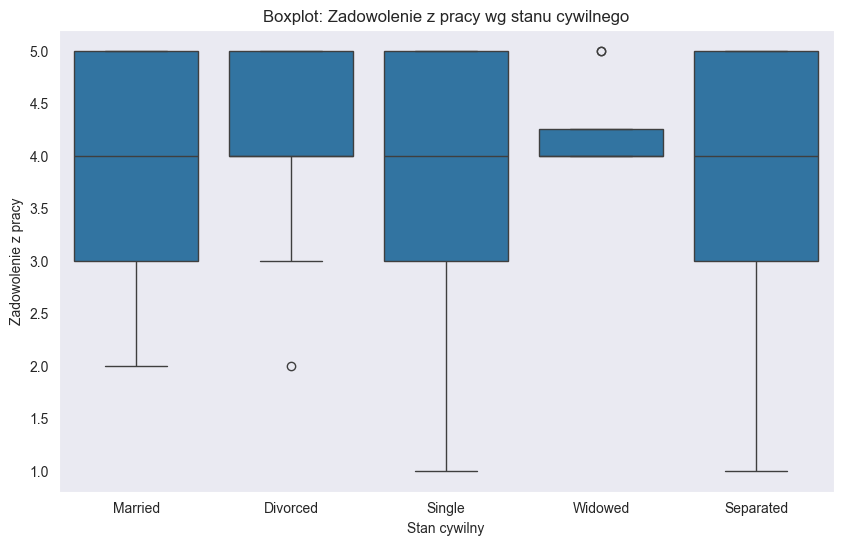

In [ ]:
#tworzenie wykresu boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalDesc', y='EmpSatisfaction', data=df_clean)
plt.title("Boxplot: Zadowolenie z pracy wg stanu cywilnego")
plt.xlabel("Stan cywilny")
plt.ylabel("Zadowolenie z pracy")
plt.show()

In [103]:
#średnie zadowolenie z pracy wg stanu cywilnego:
group_means = df_clean.groupby('MaritalDesc')['EmpSatisfaction'].mean().round(2)
print("\nŚrednie zadowolenie z pracy wg stanu cywilnego:")
print(group_means)


Średnie zadowolenie z pracy wg stanu cywilnego:
MaritalDesc
Divorced     4.03
Married      3.75
Separated    3.83
Single       3.97
Widowed      4.25
Name: EmpSatisfaction, dtype: float64


In [107]:
#określenie średniego zadowolenia z pracy
min_satisfaction = 3
max_satisfaction = 5

#pracownicy oceniający zadowolene niżej niż średnio:
df['OutOfTypicalRange'] = ~df['EmpSatisfaction'].between(min_satisfaction, max_satisfaction)

outlier_percentages = (
    df.groupby('MaritalDesc')['OutOfTypicalRange']
    .mean()
    .multiply(100)
    .round(2)
    .reset_index()
    .rename(columns={'OutOfTypicalRange': 'Percent_Outside_Range'})
)

print("Procent ocen spoza typowego zakresu (3-5) wg stanu cywilnego:")
print(outlier_percentages)

Procent ocen spoza typowego zakresu (3-5) wg stanu cywilnego:
  MaritalDesc  Percent_Outside_Range
0    Divorced                   3.33
1     Married                   4.07
2   Separated                   8.33
3      Single                   2.92
4     Widowed                   0.00


In [108]:
#ANOVA
groups = [group['EmpSatisfaction'].values for name, group in df_clean.groupby('MaritalDesc')]

f_stat, p_value = stats.f_oneway(*groups)

print("Wyniki ANOVA")
print(f"Statystyka F: {f_stat:.4f}")
print(f"Wartość p: {p_value:.4f}")

Wyniki ANOVA
Statystyka F: 1.5382
Wartość p: 0.1910


ANALIZA:

Nie zaobserwowano istotnej statystycznie korelacji między stanem cywilnym a zadowoleniem z pracy.

Zarówno analiza statystyczna (ANOVA), jak i dane wizualne (boxplot) oraz rozkład ocen nie wskazują na wyraźną korelację między stanem cywilnym a poziomem zadowolenia z pracy. Niewielkie różnice, które się pojawiają, są statystycznie nieistotne.


4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [ ]:
#obliczanie wieku pracowników
df = df[df['DOB'] <= pd.Timestamp.today()].copy()
df.loc[:, 'Age'] = ((pd.Timestamp.today() - pd.to_datetime(df['DOB'])).dt.days / 365.25).astype(int)

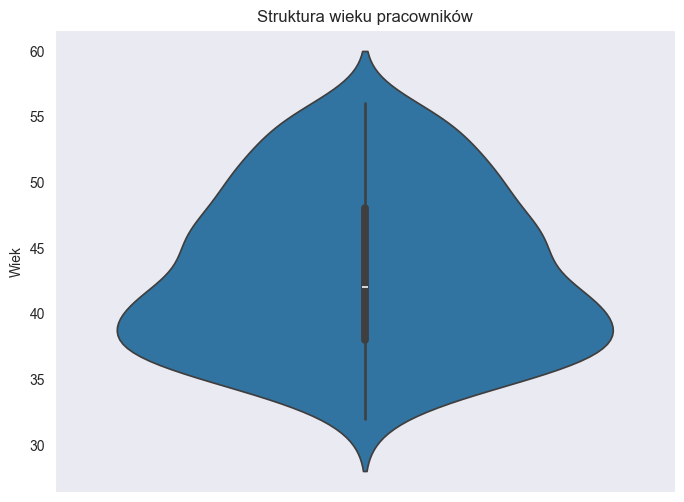

In [ ]:
#tworzenie violinplot
plt.figure(figsize=(8,6))
sns.violinplot(y=df['Age'])
plt.title("Struktura wieku pracowników")
plt.ylabel("Wiek")
plt.xlabel("")
plt.show()

In [ ]:
#podział na grupy wiekowe
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25–34', '35–44', '45–54', '55–64', '65+']

df.loc[:, 'AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

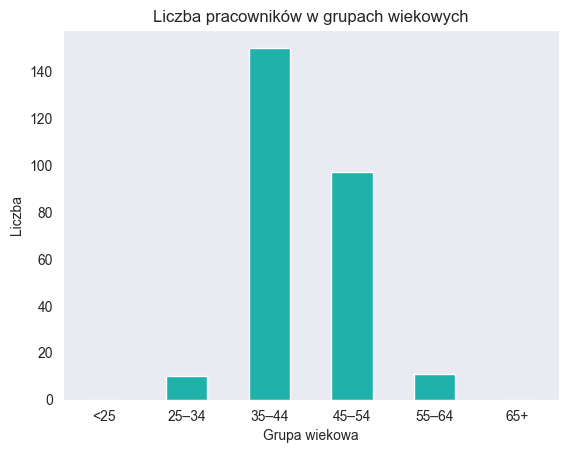

In [ ]:
#wykres słupkowy pokazujący udział grup wiekowych
df['AgeGroup'].value_counts().sort_index().plot(kind='bar', color='lightseagreen')
plt.title("Liczba pracowników w grupach wiekowych")
plt.xlabel("Grupa wiekowa")
plt.ylabel("Liczba")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#sprawdzenie statystyk: min, max, mediana, średnia wieku i najczęściej występujący przedział wiekowy
if 'DateofTermination' in df.columns:
    df_current = df[df['DateofTermination'].isna()]
else:
    df_current = df.copy()

min_age = df_current['Age'].min()
max_age = df_current['Age'].max()
median_age = df_current['Age'].median()
mean_age = df_current['Age'].mean()

age_bins = pd.cut(df_current['Age'], bins=range(20, 70, 5))
most_common_age_bin = age_bins.value_counts().idxmax()

print(f"Minimalny wiek: {min_age} lat")
print(f"Maksymalny wiek: {max_age} lat")
print(f"Mediana wieku: {median_age:.1f} lat")
print(f"Średni wiek: {mean_age:.1f} lat")
print(f"Najczęstszy przedział wiekowy: {most_common_age_bin}")

Minimalny wiek: 32 lat
Maksymalny wiek: 56 lat
Mediana wieku: 42.0 lat
Średni wiek: 42.9 lat
Najczęstszy przedział wiekowy: (35, 40]


ANALIZA:
Wiek pracowników mieści się w przedziale od 32 do 56 lat, co wskazuje na dość wąski zakres – brak jest osób bardzo młodych (<30 lat) oraz pracowników w wieku przedemerytalnym (>60 lat).

Mediana wieku wynosi 42 lata, a średni wiek to 42.9 lat – co sugeruje symetryczny rozkład danych bez znaczących odchyleń.

Najczęstszy (modalny) przedział wiekowy to 35–40 lat, co jest zgodne z kształtem violinplota – największe zagęszczenie danych właśnie w tym obszarze.

Firma zatrudnia głównie osoby w średnim wieku, co może świadczyć o stabilnym zespole z doświadczeniem zawodowym.

Dodatkowo, z analizy grup wiekowych wynika:

Największy udział wśród pracowników mają osoby w grupie wiekowej 35–44 lata, co wskazuje, że firma skupia się na zatrudnianiu osób w najbardziej aktywnym i produktywnym okresie zawodowym.

Zaraz po niej kolejną liczebną grupą jest przedział 45–54 lata, czyli pracownicy z dłuższym doświadczeniem, ale nadal aktywni zawodowo.

Najmniejszy udział mają natomiast najmłodsi (25–34 lata) oraz starsi pracownicy (55–64 lata), co może sugerować wyzwania w przyciąganiu młodych talentów oraz brak zatrudnienia osób zbliżających się do wieku emerytalnego.

5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [ ]:
#obliczanie średniej ilości specjalnych projektów wg grup wiekowych
avg_projects = df.groupby('AgeGroup', observed=False)['SpecialProjectsCount'].mean().reset_index()
print(avg_projects)

  AgeGroup  SpecialProjectsCount
0      <25                   NaN
1    25–34              0.000000
2    35–44              1.566667
3    45–54              0.938144
4    55–64              1.272727
5      65+                   NaN


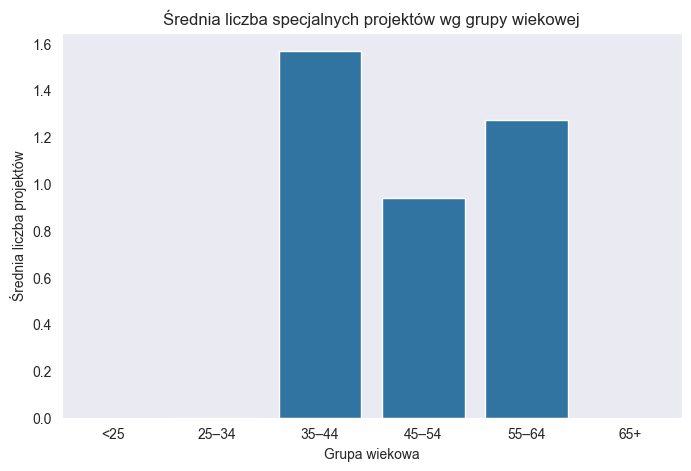

In [ ]:
#tworzenie barplot
plt.figure(figsize=(8,5))
sns.barplot(data=avg_projects, x='AgeGroup', y='SpecialProjectsCount')
plt.title('Średnia liczba specjalnych projektów wg grupy wiekowej')
plt.ylabel('Średnia liczba projektów')
plt.xlabel('Grupa wiekowa')
plt.show()

ANALIZA:

Grupa 35–44 lata wyróżnia się najwyższą średnią liczbą specjalnych projektów – ok. 1,57 projektu na pracownika. Może to sugerować, że pracownicy w tym wieku są najczęściej angażowani w działania wykraczające poza standardowe obowiązki.

Grupa 55–64 lata również osiąga relatywnie wysoki poziom – średnio 1,27 projektu, co może świadczyć o wysokim doświadczeniu i zaufaniu do starszych pracowników w kontekście projektów specjalnych.

Grupa 45–54 lata ma niższą średnią – 0,94, co może być związane z charakterem stanowisk lub polityką firmy dotyczącą przydzielania projektów.

Grupa 25–34 lata ma zdecydowanie najniższą średnią – 0 projektów, co może oznaczać: krótszy staż pracy, mniej odpowiedzialne stanowiska, ograniczone zaufanie do mniej doświadczonych pracowników w kontekście projektów specjalnych.

Grupy <25 oraz 65+ nie zawierają żadnych danych (NaN), co prawdopodobnie oznacza, że: takich pracowników w firmie nie ma,
lub ich liczba była zbyt mała, by ująć ich w analizie.

Analiza sugeruje, że pracownicy w wieku 35–44 lata są najbardziej zaangażowani w specjalne projekty, a następnie osoby w wieku 55–64 lata. Młodsi pracownicy (25–34) rzadko są angażowani w tego typu działania.